Root Mean Squared Error: 0.77
R² Score: 0.98
Predicted sales for TV=200, Radio=30, Newspaper=40: 18.31 units


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


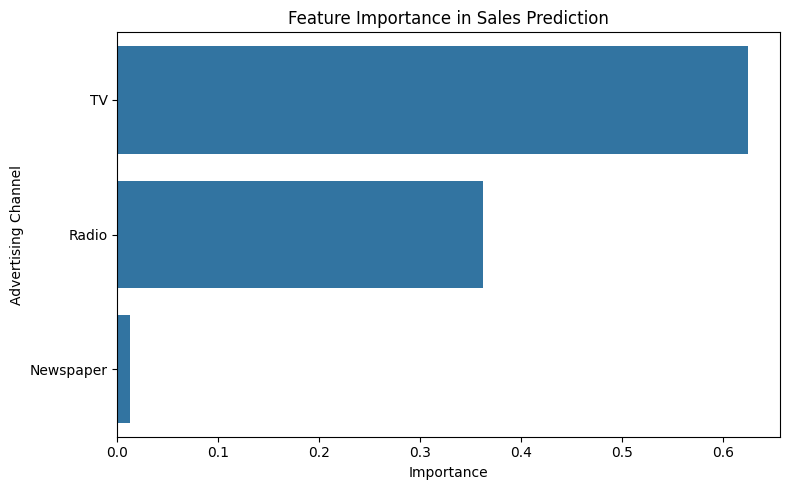

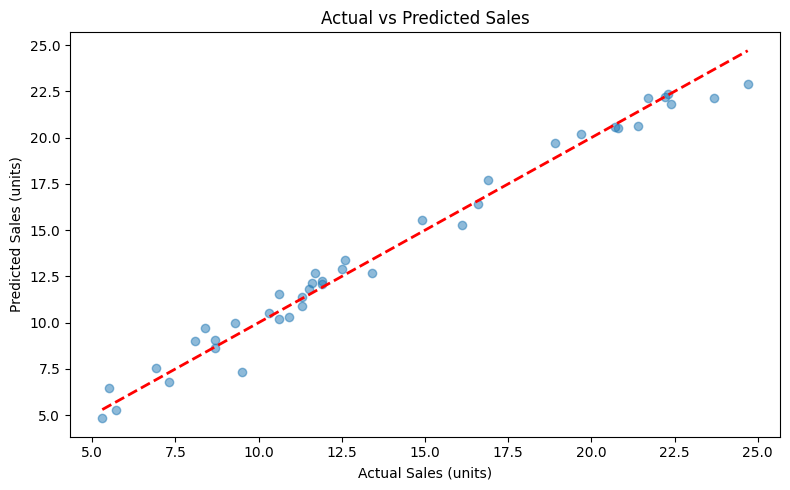

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Advertising.csv')

# Data preprocessing
# Drop the unnamed index column
data = data.drop(columns=['Unnamed: 0'])
# Define features and target
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Function to predict sales for new advertising budgets
def predict_sales(tv, radio, newspaper):
    input_data = scaler.transform([[tv, radio, newspaper]])
    prediction = model.predict(input_data)
    return prediction[0]

# Example prediction
example_sales = predict_sales(tv=200, radio=30, newspaper=40)
print(f"Predicted sales for TV=200, Radio=30, Newspaper=40: {example_sales:.2f} units")

# Feature importance visualization
feature_names = ['TV', 'Radio', 'Newspaper']
importances = model.feature_importances_

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance in Sales Prediction')
plt.xlabel('Importance')
plt.ylabel('Advertising Channel')
plt.tight_layout()
plt.show()

# Actual vs Predicted plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales (units)')
plt.ylabel('Predicted Sales (units)')
plt.title('Actual vs Predicted Sales')
plt.tight_layout()
plt.show()